*zeke*
# Assignment - 4
Apply machine learning algorithms, such as random
forests or support vector machines, to classify genomic data based on specific features
or markers.

In [1]:
import pandas as pd
import numpy as np

# Dataset Loading and cleaning

In [ ]:
data = pd.read_csv("METABRIC_RNA_Mutation.csv")
data

<ipython-input-2-93def84a7e69>:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

,0
patient_id,0
age_at_diagnosis,0
type_of_breast_surgery,22
cancer_type,0
cancer_type_detailed,15
...,...
hras_mut,0
prps2_mut,0
smarcb1_mut,0
stmn2_mut,0


In [ ]:
data_cleaned = data.dropna()
data_cleaned

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,6232,71.22,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,0,LumA,5.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1619,6233,70.65,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,0,LumB,5.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1621,6237,75.62,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,Basal,5.0,Negative,...,0,0,0,0,0,0,0,0,0,0
1623,6239,52.84,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,Normal,5.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_cleaned.isnull().sum()

,0
patient_id,0
age_at_diagnosis,0
type_of_breast_surgery,0
cancer_type,0
cancer_type_detailed,0
...,...
hras_mut,0
prps2_mut,0
smarcb1_mut,0
stmn2_mut,0


Number of rows and columns

In [ ]:
data_cleaned.shape

(1092, 693)

In [ ]:
data_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1664
Data columns (total 693 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    patient_id                      int64  
 1    age_at_diagnosis                float64
 2    type_of_breast_surgery          object 
 3    cancer_type                     object 
 4    cancer_type_detailed            object 
 5    cellularity                     object 
 6    chemotherapy                    int64  
 7    pam50_+_claudin-low_subtype     object 
 8    cohort                          float64
 9    er_status_measured_by_ihc       object 
 10   er_status                       object 
 11   neoplasm_histologic_grade       float64
 12   her2_status_measured_by_snp6    object 
 13   her2_status                     object 
 14   tumor_other_histologic_subtype  object 
 15   hormone_therapy                 int64  
 16   inferred_menopausal_state       object 
 17   integrative_clust

In [ ]:
data_cleaned.sample(5)

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
patient_id,,,,,,,,,,,,,,,,,,,,,
5457,52.57,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumA,3.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
496,60.00,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,Normal,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
3371,66.15,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,2.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
3500,66.91,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,Basal,2.0,Negative,Negative,...,0,0,0,0,0,0,0,0,0,0
3412,55.28,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,2.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


1. Join column overall_survival
2. rows all
3. columns from 30 to 318

In [ ]:
df_expression = data_cleaned.iloc[:,30:519].join(data_cleaned['overall_survival'], how='inner')
df_expression

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
patient_id,,,,,,,,,,,,,,,,,,,,,
2,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1
8,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,0
10,-0.4341,0.6931,0.6909,1.0840,-1.9371,0.9252,1.1520,0.7951,-0.9677,-0.7750,...,0.0395,0.8191,0.1977,-0.2302,-0.5092,-0.3021,0.9357,-0.4217,0.5340,0
28,0.8347,-1.5038,0.3436,-0.5550,0.0558,-0.9155,-0.8571,-0.1267,-0.1705,0.6442,...,-0.1405,-0.9780,-0.3030,-0.1640,1.0783,1.8263,-0.5965,0.1502,-0.8837,0
35,-1.0087,-0.6074,0.0313,1.0975,0.5314,0.9105,-1.5068,-0.0196,0.3726,0.4892,...,-0.4788,3.6125,1.9925,0.2253,-0.8414,1.7093,-0.6921,0.6906,-0.8006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,-0.5621,-0.3682,-0.8869,-0.7437,0.2659,-0.1018,0.2154,-0.1599,1.4473,0.1943,...,-0.7156,-0.5093,0.5943,0.4507,0.2100,0.1209,-0.0498,-0.5463,2.8648,0
6233,-0.4151,-0.2158,-0.2229,0.6256,0.1746,2.0361,0.1095,0.1703,0.4698,0.6346,...,-2.2898,0.7959,0.5885,-0.5030,-0.2028,0.1612,-0.7089,-0.9014,-0.6310,1
6237,0.3941,-0.9708,-0.5213,0.0413,0.6041,0.4105,-0.0416,0.1824,0.5114,0.4438,...,-1.1495,-1.2216,-0.7379,1.8240,0.2230,-0.3529,-0.3898,0.3046,-0.6861,0



# Dictionary to store F1 and accuracy scores of each model

In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score)
metrics_summary = {"Model": [], "F1 Score": [], "Accuracy": []}

# Function to evalute and display result

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    # Prediction probablity
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr( model, 'predict_proba') else None
    # hasattr checks wheather particular model has probablity prob or not.
    # ":" represents all rows
    # "1" represent 2nd column (This column shows probality_prob from all instances)


    # Calculate metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Store the metrics
    metrics_summary["Model"].append(model_name)
    metrics_summary["F1 Score"].append(f1)
    metrics_summary["Accuracy"].append(accuracy)

    # Display classification metrics
    print(f"\n=== {model_name} ===")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # AUC-ROC Score (if applicable)
    if y_proba is not None:
        print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba):.4f}")



# Main function to process the dataset and evaluate models


=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       188
           1       0.55      0.58      0.56       140

    accuracy                           0.62       328
   macro avg       0.61      0.61      0.61       328
weighted avg       0.62      0.62      0.62       328

Accuracy: 0.6189
F1 Score: 0.6199


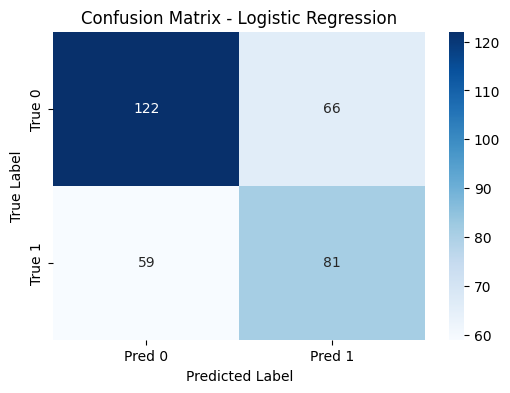

AUC-ROC Score: 0.6254

=== Random Forest ===
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.83      0.73       188
           1       0.64      0.41      0.50       140

    accuracy                           0.65       328
   macro avg       0.65      0.62      0.62       328
weighted avg       0.65      0.65      0.64       328

Accuracy: 0.6524
F1 Score: 0.6351


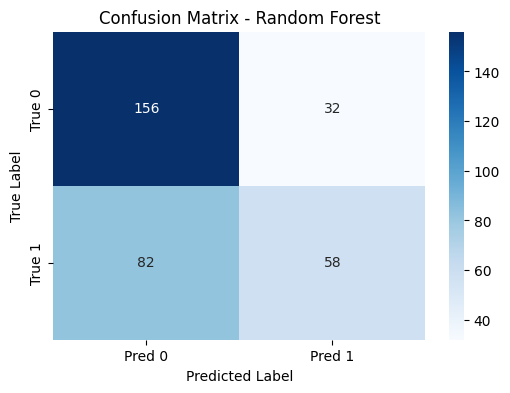

AUC-ROC Score: 0.7024

=== Gradient Boosting ===
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67       188
           1       0.55      0.49      0.52       140

    accuracy                           0.61       328
   macro avg       0.60      0.59      0.59       328
weighted avg       0.60      0.61      0.61       328

Accuracy: 0.6098
F1 Score: 0.6059


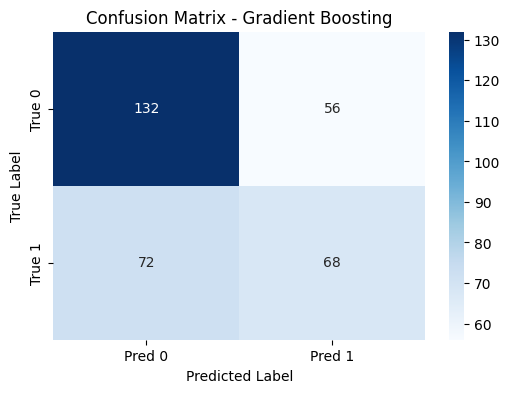

AUC-ROC Score: 0.6624


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== AdaBoost ===
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       188
           1       0.53      0.53      0.53       140

    accuracy                           0.60       328
   macro avg       0.59      0.59      0.59       328
weighted avg       0.60      0.60      0.60       328

Accuracy: 0.6006
F1 Score: 0.6004


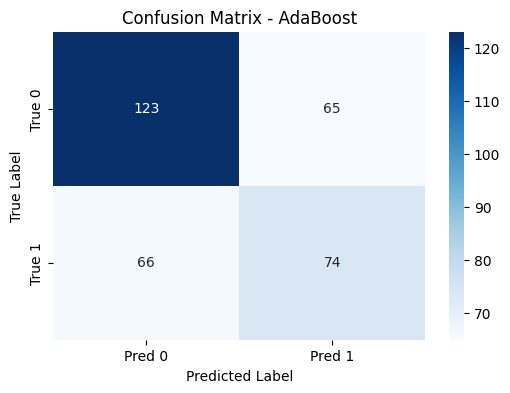

AUC-ROC Score: 0.6148

=== K-Nearest Neighbors ===
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63       188
           1       0.48      0.44      0.46       140

    accuracy                           0.56       328
   macro avg       0.55      0.55      0.55       328
weighted avg       0.56      0.56      0.56       328

Accuracy: 0.5610
F1 Score: 0.5579


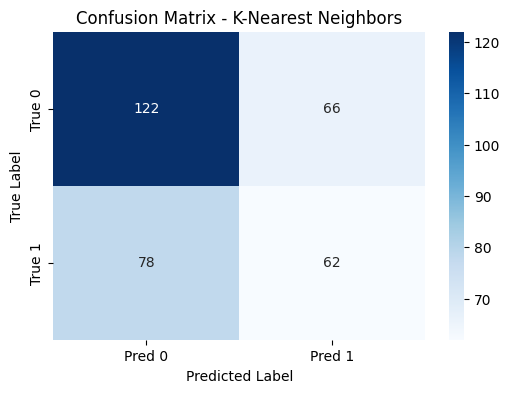

AUC-ROC Score: 0.5961

=== Support Vector Classifier ===
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.75       188
           1       0.67      0.46      0.54       140

    accuracy                           0.67       328
   macro avg       0.67      0.65      0.65       328
weighted avg       0.67      0.67      0.66       328

Accuracy: 0.6738
F1 Score: 0.6600


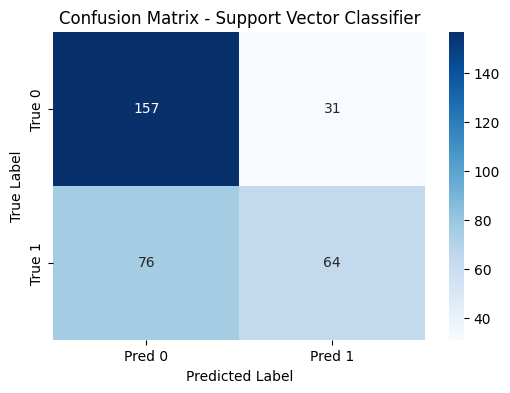

AUC-ROC Score: 0.7029

=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       188
           1       0.51      0.54      0.52       140

    accuracy                           0.58       328
   macro avg       0.58      0.58      0.58       328
weighted avg       0.59      0.58      0.58       328

Accuracy: 0.5823
F1 Score: 0.5834


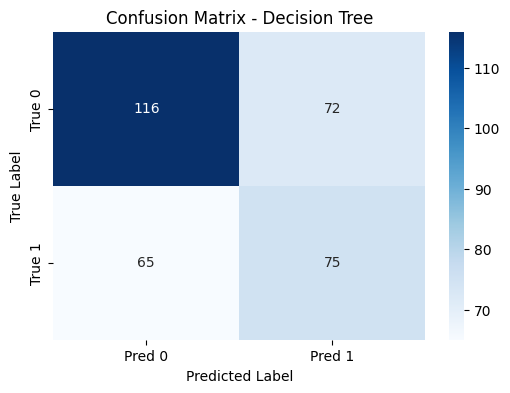

AUC-ROC Score: 0.5764


<ipython-input-35-bff8c076f756>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_summary["Model"],


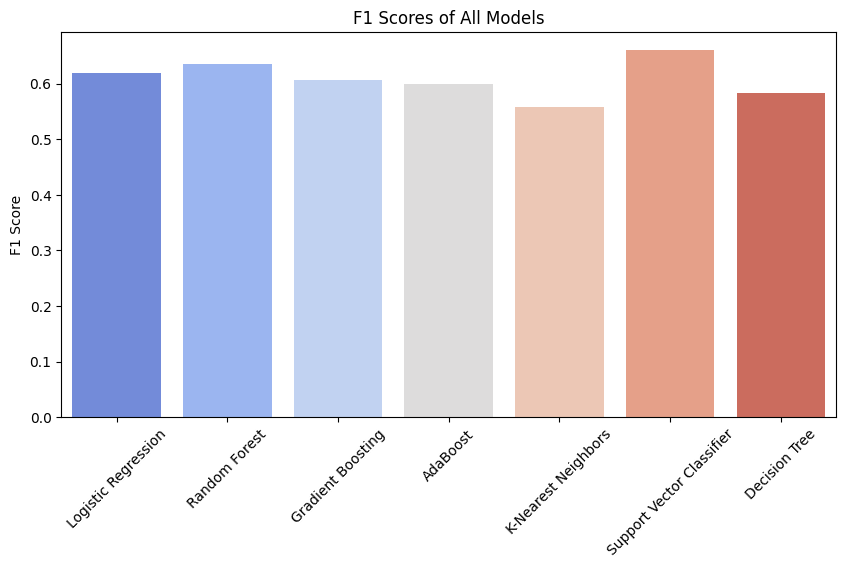

<ipython-input-35-bff8c076f756>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_summary["Model"],


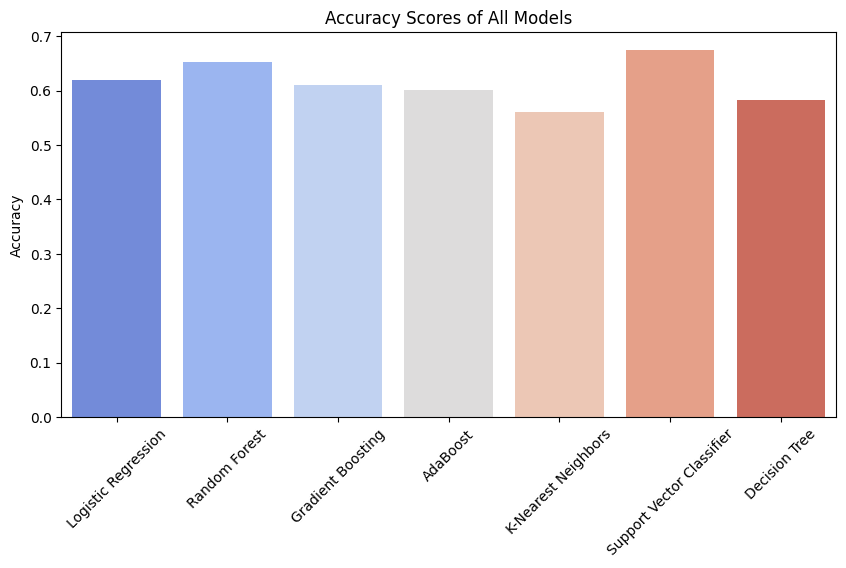

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def main(df, target_column):
    # Prepare the dataset
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    '''
    X : Contains all columns except the target column
    y : Contains only the target column

    '''


    # Handle categorical variables
    X = pd.get_dummies(X, drop_first=True)
    '''
    creating dummy columns
    '''
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)
    '''
    converting object into numerical form using LabelEncoder()
    '''

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    # Define classifiers to be evaluated
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Classifier': SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier()
    }

    # Train and evaluate all models
    for name, model in models.items():
        evaluate_model(model, X_train, X_test, y_train, y_test, name)

    # Plot F1 Scores of all models
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_summary["Model"],
                y=metrics_summary["F1 Score"], palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('F1 Scores of All Models')
    plt.ylabel('F1 Score')
    plt.show()

    # Plot Accuracy Scores of all models
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_summary["Model"],
                y=metrics_summary["Accuracy"], palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('Accuracy Scores of All Models')
    plt.ylabel('Accuracy')
    plt.show()


# Load your dataset and specify the target column
if __name__ == "__main__":  # Corrected __name__ with double underscores
    # Replace with your dataframe
    df = df_expression  # Example input dataframe
    target_column = 'overall_survival'  # Replace with the actual target column name
    main(df, target_column)